In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
with open("/content/drive/MyDrive/Colab Notebooks/Harry Potter.txt", 'r') as file:
    text = file.read().lower()


In [4]:
text = re.sub(r'[^a-z\s]', '', text)

In [5]:
words = word_tokenize(text)

In [6]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [7]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Join the filtered words back into a string
cleaned_text = ' '.join(filtered_words)

In [8]:
from collections import Counter
word_counts = Counter(words)
threshold = 2
filtered_words = [word for word in words if word_counts[word] <= threshold]
filtered_text = ' '.join(filtered_words)


In [9]:
word_counts = Counter(words)

# Define a frequency threshold for rare words (e.g., remove words that appear only once)
threshold = 1

# Step 3: Remove words that appear less than or equal to the threshold (rare words)
filtered_words = [word for word in words if word_counts[word] > threshold]

# Join the filtered words back into a string
filtered_text = ' '.join(filtered_words)

In [10]:
#stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_text = ' '.join(stemmed_words)

In [11]:
stemmed_text=filtered_text.splitlines()

In [12]:
texts=word_tokenize(filtered_text)

In [13]:
texts[:10]

['harry',
 'potter',
 'and',
 'the',
 'sorcerers',
 'stone',
 'chapter',
 'one',
 'the',
 'boy']

In [14]:
b = {}
for w in texts:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram=(ch1, ch2)
    b[bigram]=b.get(bigram, 0) + 1

In [15]:
sorted_items=sorted(b.items(), key=lambda kv: kv[1])
print(sorted_items[:10])

[(('y', 'k'), 2), (('j', 'i'), 2), (('n', 'b'), 2), (('f', 'm'), 2), (('n', 'r'), 2), (('v', 'c'), 2), (('m', 'n'), 2), (('h', 'f'), 2), (('l', 'n'), 2), (('g', 'm'), 2)]


In [16]:
import torch


In [17]:
M=torch.zeros((27,27), dtype=torch.int32)
chars=sorted(list(set('.'+''.join(texts))))
stoi = {s:i for i,s in enumerate(chars)}
itos = {i:s for s,i in stoi.items()}
print(chars)
print(len(chars))
b = {}
for w in texts:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    M[ix1, ix2] += 1


['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
27


In [18]:
M.shape

torch.Size([27, 27])

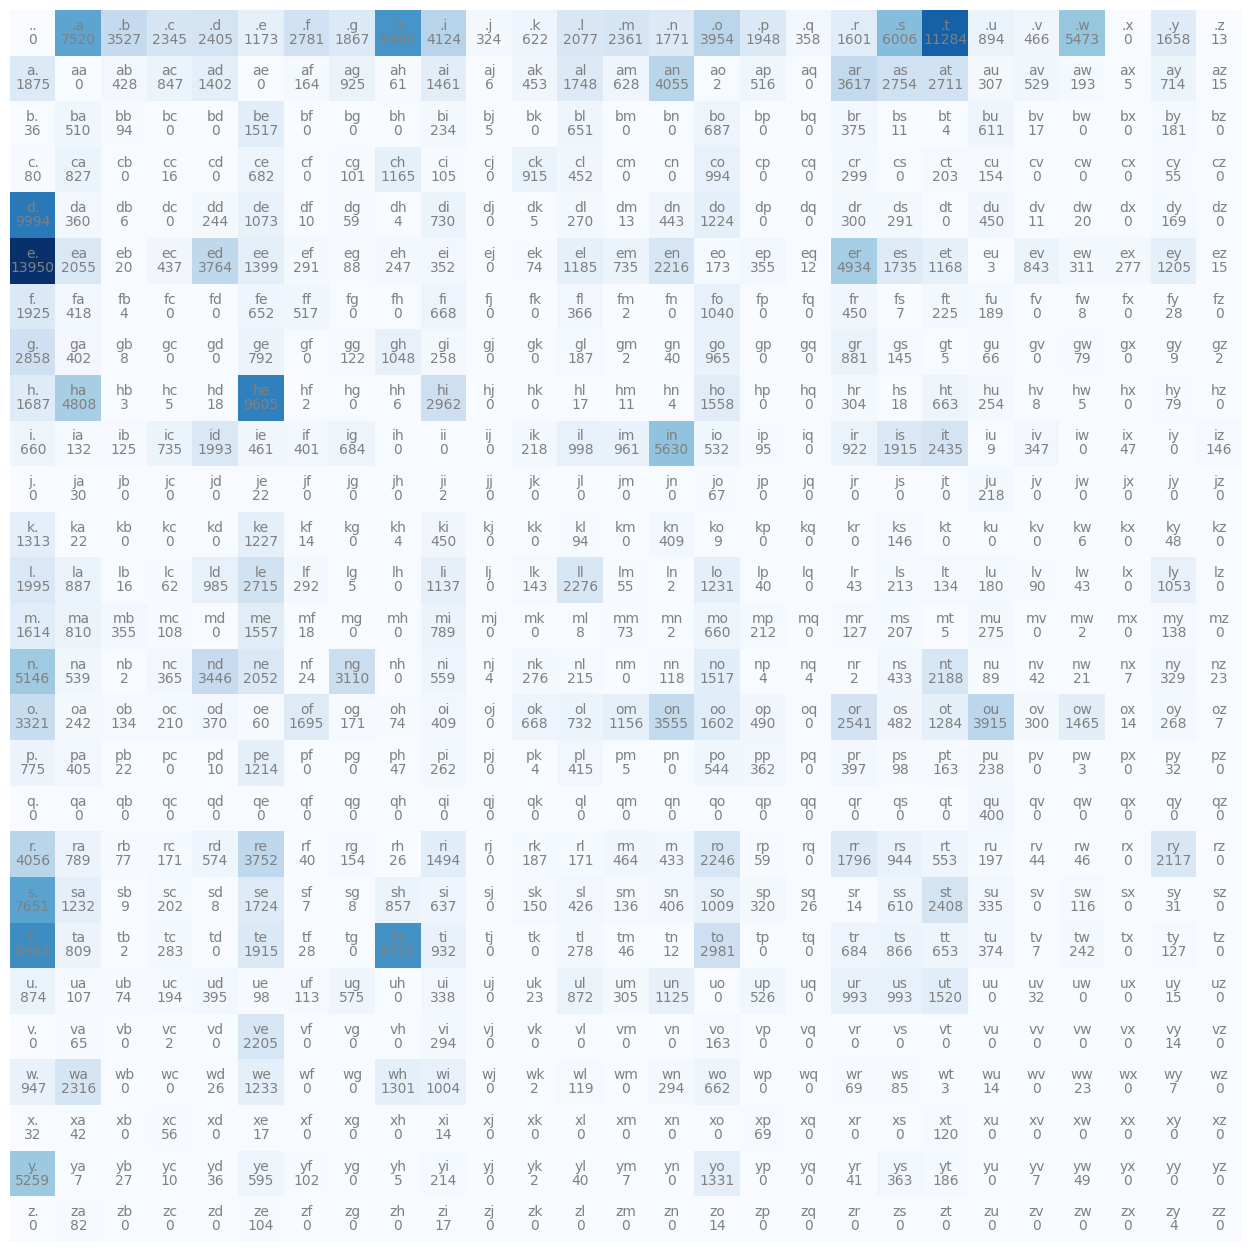

In [19]:
plt.figure(figsize=(16,16))
plt.imshow(M, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, M[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [20]:
p = M[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1003, 0.0470, 0.0313, 0.0321, 0.0156, 0.0371, 0.0249, 0.1128,
        0.0550, 0.0043, 0.0083, 0.0277, 0.0315, 0.0236, 0.0527, 0.0260, 0.0048,
        0.0213, 0.0801, 0.1504, 0.0119, 0.0062, 0.0730, 0.0000, 0.0221, 0.0002])

In [21]:
g = torch.Generator().manual_seed(2147483647)
p=torch.rand(3, generator=g)
p=p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [22]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [23]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'.'

In [24]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
  out=[]
  ix=0
  while True:
   p = M[ix].float()
   p=p/p.sum()
   ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
   out.append(itos[ix])
   if ix==0:
    break
  print(''.join(out))



munid.
d.
anasad.
p.
he.
y.
acry.
fouthitoler.
s.
the.


In [25]:
P = (M+1).float()
P /= P.sum(1, keepdims=True)

In [26]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

munid.
d.
anasad.
p.
he.


In [27]:
M = torch.tensor(M, dtype=torch.float32)  # Convert to float for division

# Convert counts into probabilities by normalizing the rows
# Adding 1e-6 to avoid division by zero if any row sums to zero
row_sums = M.sum(1, keepdim=True) + 1e-6
P = M / row_sums  # Probability matrix

<ipython-input-27-2c8a4b23a172>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  M = torch.tensor(M, dtype=torch.float32)  # Convert to float for division


In [28]:
def predict_next_word(word, P, stoi, itos, g=None):
    # Find the index of the given word in the 'stoi' dictionary
    ix = stoi.get(word, None)

    if ix is None:
        print(f"Word '{word}' not found in the vocabulary.")
        return None

    # Get the probability distribution for the next word (the row corresponding to 'word')
    probs = P[ix]

    # Sample the next word index using the probability distribution
    next_ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()

    # Return the predicted word using 'itos'
    return itos[next_ix]

# Example usage:
g = torch.Generator().manual_seed(2147483647)  # Seed for reproducibility
next_char = predict_next_word('h', P, stoi, itos, g=g)
print(f"Next predicted word: {next_char}")

Next predicted word: e


In [29]:
g = torch.Generator().manual_seed(2147483647)  # Seed for reproducibility
next_char = predict_next_word('e', P, stoi, itos, g=g)
print(f"Next predicted word: {next_char}")

Next predicted word: .


In [30]:
print(stoi)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [31]:
all_text = ' '.join(texts)

In [32]:
words = list(set(all_text.split()))  # Extract unique words
stoi = {word: i for i, word in enumerate(words)}
itos = {i: word for word, i in stoi.items()}

In [33]:
print(stoi)

{'suppose': 0, 'detention': 1, 'substance': 2, 'dormitories': 3, 'blinking': 4, 'fists': 5, 'flitwick': 6, 'directions': 7, 'tired': 8, 'prophet': 9, 'incredible': 10, 'blazing': 11, 'wonder': 12, 'drawn': 13, 'animal': 14, 'perfectly': 15, 'griphook': 16, 'smoothly': 17, 'snout': 18, 'moment': 19, 'hungry': 20, 'drinking': 21, 'joking': 22, 'scrambled': 23, 'redder': 24, 'spposed': 25, 'sharply': 26, 'earth': 27, 'chest': 28, 'better': 29, 'third': 30, 'goblins': 31, 'corridors': 32, 'tape': 33, 'managed': 34, 'sinking': 35, 'want': 36, 'manage': 37, 'folded': 38, 'sickening': 39, 'bill': 40, 'shown': 41, 'erised': 42, 'touching': 43, 'level': 44, 'easier': 45, 'orange': 46, 'jam': 47, 'fork': 48, 'toys': 49, 'nightmare': 50, 'armed': 51, 'noticing': 52, 'difficulty': 53, 'from': 54, 'hurry': 55, 'noise': 56, 'everything': 57, 'more': 58, 'demanded': 59, 'clutched': 60, 'dont': 61, 'sorcerers': 62, 'unicorn': 63, 'mr': 64, 'statues': 65, 'brain': 66, 'slamming': 67, 'drawling': 68, 'e

In [34]:
vocab_size = len(words)
M = torch.zeros((vocab_size, vocab_size), dtype=torch.int32)

In [36]:
for sentence in words:
    # Split each sentence into words and pad with start and end tokens (e.g., '.')
    word_list = ['.'] + sentence.split() + ['.']
    # For each word bigram (word1, word2), update the matrix
    for word1, word2 in zip(word_list, word_list[1:]):
        ix1 = stoi.get(word1, None)  # Index of word1
        ix2 = stoi.get(word2, None)  # Index of word2
        if ix1 is not None and ix2 is not None:
            M[ix1, ix2] += 1  # Update

In [37]:
print("Bigram Count Matrix (M):")
print(M)

Bigram Count Matrix (M):
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)


In [38]:
p= M.float() + 1

In [39]:

p = p / p.sum(1, keepdims=True)
p

tensor([[0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        ...,
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003]])

In [42]:
def predict_next_word(word, P, stoi, itos, g=None):
    ix = stoi.get(word, None)  # Get the index of the word
    if ix is None:
        print(f"Word '{word}' not found in the vocabulary.")
        return None

    # Get the probability distribution for the next word (the row corresponding to 'word')
    probs = p[ix]

    # Sample the next word index using the probability distribution
    g = torch.Generator().manual_seed(torch.randint(0, 2**32, (1,)).item()) if g is None else g
    next_ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()

    # Return the predicted word
    return itos[next_ix]

# Step 10: Test the prediction with an example word
word = "Harry".lower()  # Ensure consistent casing (lowercase in this case)
next_word = predict_next_word(word, p, stoi, itos)
print(f"Next predicted word after '{word}': {next_word}")

Next predicted word after 'harry': goin


In [43]:
words_to_test = ["harry", "hermione", "ron", "voldemort"]
for word in words_to_test:
    next_word = predict_next_word(word, p, stoi, itos)
    print(f"Next predicted word after '{word}': {next_word}")

Next predicted word after 'harry': things
Next predicted word after 'hermione': indeed
Next predicted word after 'ron': lent
Next predicted word after 'voldemort': portraits
